<h1 style='text-align: center; front-size: 50px;'>Instacart Customer Behavior Analysis</h1>

# Itroduction:
 In this project, we will work with data from "instacart". Instacart is a grocery delivery platform where customers
 can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. It was montioned
 that the dataset provided has been modified from the original for a better and faster calculations.
 Our mission is to clean up the data and prepare a report that gives insight into the shopping habits
 of Instacart customers.
 There are five tables in the dataset, and we’ll need to use all of them to do our data preprocessing. They are stored in:
    /datasets/instacart_orders.csv,
    /datasets/products.csv,
    /datasets/aisles.csv,
    /datasets/departments.csv,
    /datasets/order_products.csv
 During our data preprocessing we will:
    Display the dataset following to the standardized format,
    Verify and fix data types,
    Identify and fill in missing values,
    Identify and remove duplicate values,
    Create plots that communicate clear and concise understanding of the data.


In [ ]:
import pandas as pd
orders = pd.read_csv ('/datasets/instacart_orders.csv', sep = ';')
orders.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [ ]:
import pandas as pd
products = pd.read_csv('/datasets/products.csv', sep = ';')
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
import pandas as pd
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
import pandas as pd
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
import pandas as pd
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Find and remove duplicate values:

### `orders` data frame

In [ ]:
# Check for duplicated orders
orders.duplicated().sum()


15

In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
wednesday_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [ ]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)

In [ ]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [ ]:
# Double check for duplicate order IDs only
orders.duplicated(subset='order_id').sum()

0

We identified 15 missing values. The missing values are not critical, so we droped all rows with missing values.

### `products` data frame

In [ ]:
# Check for fully duplicate rows
products.duplicated().sum()


0

In [ ]:
# Check for just duplicate product IDs
products.duplicated(subset='product_id').sum()

0

In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()


1361

In [ ]:
# Check for duplicate product names that aren't missing
products['product_name'].dropna().str.lower().duplicated().sum()

104

Converting product names to lowercase showed 1361 duplicates on the missing values and 104 on the non missing values. They should be adressed to ensure data accuracy

### `departments` data frame

In [ ]:
departments.duplicated().sum()


0

For departments dataset we noticed that there is no duplicated values

### `aisles` data frame

In [ ]:
aisles.duplicated().sum()

0

For aisles dataset we noticed that there is no duplicated values

### `order_products` data frame

In [ ]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [ ]:
# Double check for any other tricky duplicates
order_products.duplicated(subset =['order_id', 'product_id']).sum()

0

For order_products dataset we noticed that there is no duplicated values

## Find and remove missing values


### `products` data frame

In [ ]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [ ]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [ ]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [ ]:
# What is this ailse and department?
filtered_department = departments[departments['department_id'] == 21]
filtered_department

,department_id,department
20,21,missing


In [ ]:
# Added by reviewer
filtered_aisles = aisles[aisles['aisle_id'] == 100]
filtered_aisles

,aisle_id,aisle
99,100,missing


In [ ]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [ ]:
# Are there any missing values where it's not a customer's first order?
not_first_orders = orders[orders['order_number'] > 1]

missing_values = not_first_orders['days_since_prior_order'].isnull().sum()

missing_values

0

No missing values were found in the days_since_prior_order column for orders beyond the customer's first order.

### `order_products` data frame

In [ ]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()


(1.0, 64.0)

In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
missing_order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [ ]:
# Do all orders with missing values have more than 64 products?
order_counts = order_products[order_products['order_id'].isin(missing_order_ids)].groupby('order_id').size()
check = (order_counts > 64).all()
check

True

In [ ]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999).astype('int')


0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64

After our analysis we can say that all orders with missing values have more than 64 products.

In [ ]:
# Check for 'order_hour_of_day':
if (orders['order_hour_of_day'].min() >= 0) and (orders['order_hour_of_day'].max() <= 23):
    print("'order_hour_of_day' values are sensible.")
else:
    print("'order_hour_of_day' values are not sensible.")

# Check for 'order_dow':
if (orders['order_dow'].min() >= 0) and (orders['order_dow'].max() <= 6):
    print("'order_hour_of_day' values are sensible.")
else:
    print("'order_hour_of_day' values are not sensible.")

'order_hour_of_day' values are sensible.
'order_hour_of_day' values are sensible.


### What time of day do people shop for groceries?

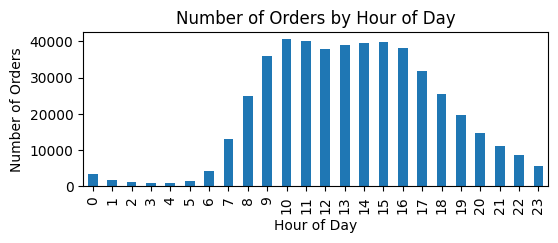

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,2))
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')

plt.show()

After filtering the orders dataframe based on hour of the day, we noticed that the number of orders is at its peak between 9 a.m and 5 p.m.

### What day of the week do people shop for groceries?

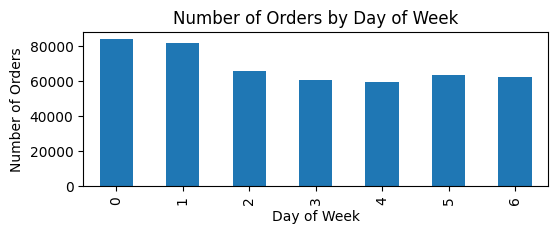

In [ ]:
plt.figure(figsize=(6,2))
orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

plt.show() 

According to the plot, the number of orders is steady during all days of the week, but we noticed that their groceries shopping are in there peak on the first 2 days of the week.

### How long do people wait until placing another order?

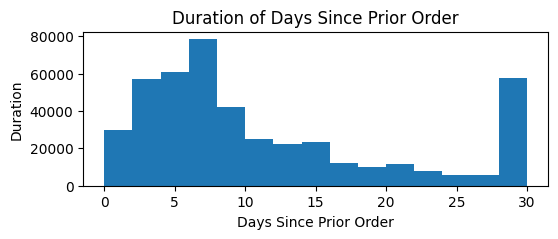

In [ ]:
plt.figure(figsize=(6,2))
orders['days_since_prior_order'].plot(kind='hist', bins=15)
plt.title('Duration of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Duration')

plt.show()  

The plot is showing that the majority of people wait from a day to 7 days before placing their second order. We also noticed that some people tend to wait 30 days till their second order.

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

In [ ]:
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

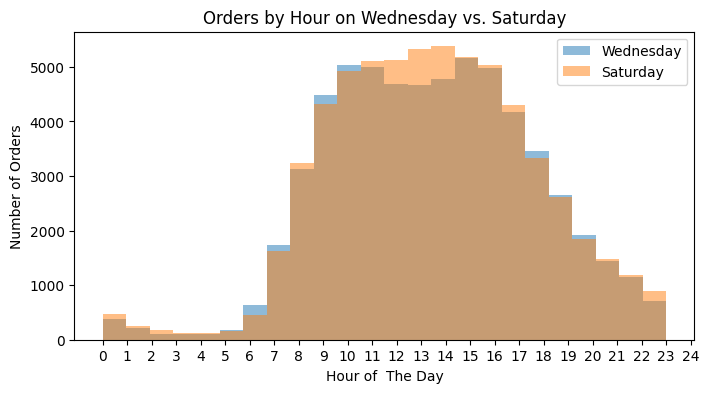

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')
plt.xlabel('Hour of  The Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour on Wednesday vs. Saturday')
plt.xticks(range(0, 25))
plt.legend()

plt.show()

From the plot above, we can say that the number of orders on Wednesday and Saturday are similer, with a slight increase on Saturday between 10 a.m and 3 p.m.

### What's the distribution for the number of orders per customer?

In [ ]:
customer_order_counts = orders['user_id'].value_counts()
customer_order_counts

149605    28
193164    26
78375     25
148162    24
66664     24
          ..
166116     1
63564      1
170214     1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64

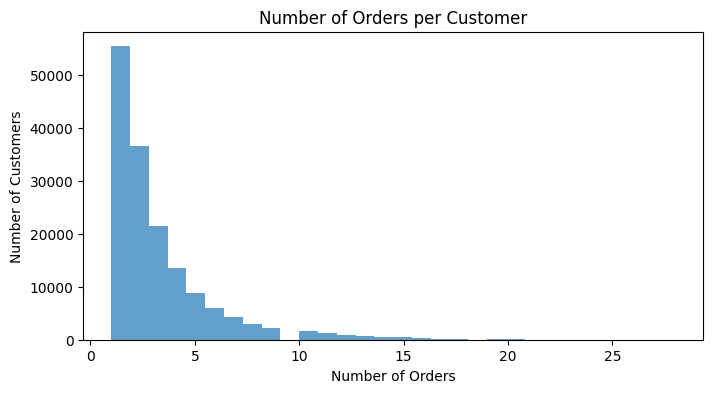

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(customer_order_counts, bins=30, alpha=0.7)
plt.title('Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

plt.show()

Based on the plot, the data indicates that most customers place at least 4 orders, but there is a noticeable drop in the number of customers once they reach the 5 order mark.

### What are the top 20 popular products?

In [ ]:
merged_datasets = order_products.merge(products, on="product_id")
top_products = (merged_datasets.groupby(["product_id", "product_name"]).size().sort_values(ascending=False))

In [ ]:
top_products.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

After filtering the ordered products data, we can say that perishables, such as fruits and vegetables, are the dominant products.

### How many items do people typically buy in one order?

In [ ]:
items_per_order = order_products.groupby('order_id').size().sort_values(ascending=False)
items_per_order

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Length: 450046, dtype: int64

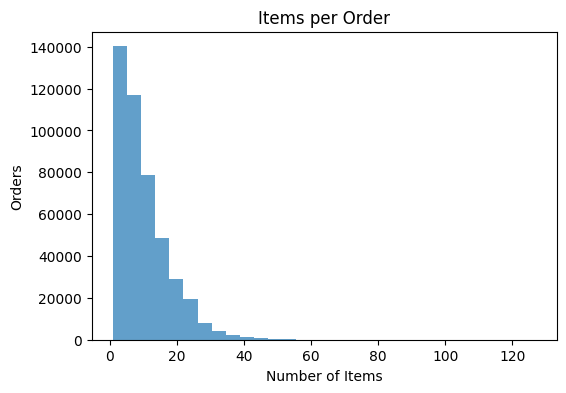

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(items_per_order, bins=30, alpha=0.7)
plt.title('Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Orders')

plt.show()

From the plot, we can say that the higher the number of items bought the number of people drops. Typically, the number of items bought can range between 127 and 1 item per order.

### What are the top 20 items that are reordered most frequently?

In [ ]:
top_20_reorder = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20).reset_index()
top_20_reorder.columns = ['product_id', 'count'] 
top_20_reordered = top_20_reorder.merge(products[['product_id', 'product_name']], on='product_id')
top_20_reordered

,product_id,count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


After looking into the ordered products data, we noticed that the top 20 reorder products are mostly perishables such as vegetables and fruits.

# General Conclusion:

Based on the datasets provided: 

  - We noticed that the number of orders is at its peak between 9 a.m and 5 p.m.
  
  - The number of orders is steady during all days of the week, but we noticed that people tend to do more groceries on the first 2 days of the week.
  
  - The majority of people wait from a day to 7 days before placing their second order. We also noticed that some people tend to wait 30 days till their second order.
  
  - We can say that the number of orders on Wednesday and Saturday are similer, with a slight increase on Saturday between 10 a.m and 3 p.m.
  
  - Most customers place at least 4 orders, but there is a noticeable drop in the number of customers once they reach the 5 order mark.
  
  - We can say that the higher the number of items bought the number of people drops.
  
  - We noticed that the top 20 reorder products are mostly perishables such as vegetables and fruits.
